### Ejercicio 1

Pokemon es una saga RPG muy famosa a nivel mundial. La misión de estos juegos es capturar y entrenar a los pokemon, unas criaturas que habitan en todo el continente, para hacerse con el título de maestro de la liga Pokemon. Los Pokemons son criaturas muy diversas, hay muchos tipos diferentes y algunos de ellos pueden evolucionar.

En este ejercicio exploraremos los Pokemons de la primera generación con el dataset `pokemon.csv`. <span style="font-family: Courier New; background-color: #82b74b; color: #000000; padding: 3px; ">NM</span> 


1. ¿Cuántos Pokemons legendarios hay? Cuántos Pokemons hay de cada tipo de evolución (_variable Stage_)?

2. ¿Cuál es el tipo más frecuente? Y el menos?

3. Un nuevo entrenador tiene que escoger entre 3 Pokemons iniciales (Bulbasaur, Charmander y Squirtle) y nos ha pedido que le ayudemos a decidir basándonos en las estadísticas de los pokemons de estos tres tipos (Grass, Fire y Water) . Si nos centramos sólo en las características de ataque y defensa, qué tipo deberíamos recomendar?

**Representa las respuestas gráficamente.**

Pista: podéis utilizar la función jointplot que hemos visto en el Notebook de teoría. Considerad qué tipo de gráfica, de entre las que ofrece jointplot, se ajusta a los requerimientos del enunciado.

**(2.5 puntos)**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = '/Users/nicolasdalessandro/Desktop/Módulo 8/data/'

In [3]:
df = pd.read_csv('pokemon.csv')

In [4]:
df.head()

,Number,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [5]:
def make_pie_plot(labels,sizes,title=False):
    # Pie chart
    #colors
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
    #explsion

    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
    #draw circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()

    fig.gca().add_artist(centre_circle)
    # Equal aspect ratio ensures that pie is drawn as a circle  
    plt.tight_layout()
    if title !=False:
        plt.title(title)
    plt.show()

## Preprocessing

Una best practice suele ser no tener columnas con espacios.

In [6]:
df.columns = df.columns.str.replace(' ', '_')

#### Respuesta 1

,Legendary,Number
0,False,147
1,True,4


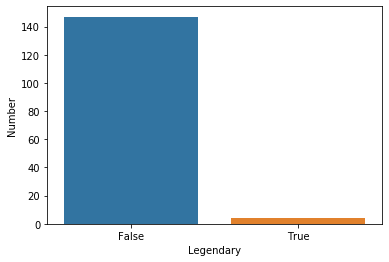

In [7]:
groupe1 = df.groupby('Legendary').agg({'Number':'count'}).reset_index()
g=sns.barplot(x='Legendary',y='Number',data=groupe1)
groupe1

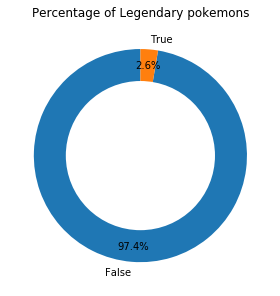

In [8]:
make_pie_plot(groupe1.Legendary.values,groupe1.Number.values,title = 'Percentage of Legendary pokemons')

In [9]:
print('Existen {} pokemon legendarios.'.format(df[df['Legendary'] == True].shape[0]))

Existen 4 pokemon legendarios.


,Stage,Number
0,1,79
1,2,56
2,3,16


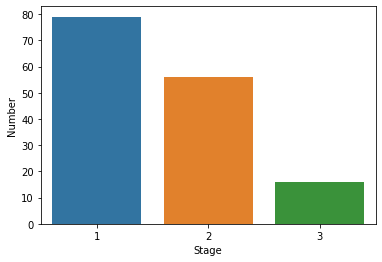

In [10]:
groupe2 = df.groupby('Stage').agg({'Number':'count'}).reset_index()
g=sns.barplot(x='Stage',y='Number',data=groupe2)
groupe2

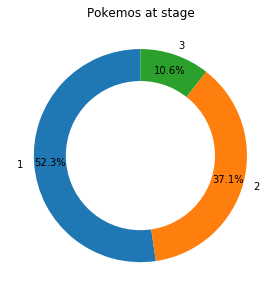

In [11]:
make_pie_plot(groupe2.Stage.values,groupe2.Number.values,title= 'Pokemos at stage')

#### Respuesta 2

,Type_1,Number
0,Water,28
1,Normal,22
2,Poison,14
3,Bug,12
4,Fire,12
5,Grass,12
6,Electric,9
7,Rock,9
8,Ground,8
9,Psychic,8


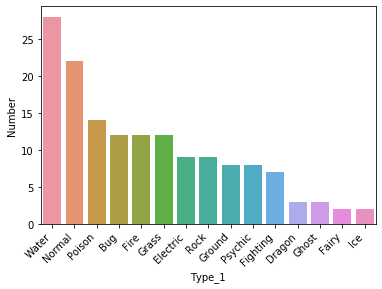

In [12]:
groupe3 = df.groupby('Type_1').agg({'Number':'count'}).reset_index()
groupe3 = groupe3.sort_values('Number', ascending = False).reset_index(drop=True)
g=sns.barplot(x='Type_1',y='Number',data=groupe3)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
groupe3

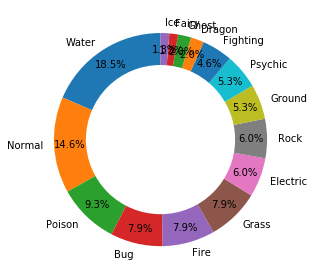

In [13]:
make_pie_plot(groupe3.Type_1.values,groupe3.Number.values)

In [15]:
print('El tipo con mayor frecuencia es "{}" y el de menor frecuencia "{}"'.format(
    groupe3.loc[0,'Type_1'], groupe3.loc[len(groupe3.index)-1,'Type_1']))

El tipo con mayor frecuencia es "Water" y el de menor frecuencia "Ice"


#### Respuesta 3

In [16]:
df[df['Name'].isin(['Bulbasaur', 'Charmander','Squirtle'])]

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
6,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [17]:
top3 = df[df['Name'].isin(['Bulbasaur', 'Charmander','Squirtle'])].copy()

 **Si nos centramos sólo en las características de ataque y defensa, qué tipo deberíamos recomendar?**

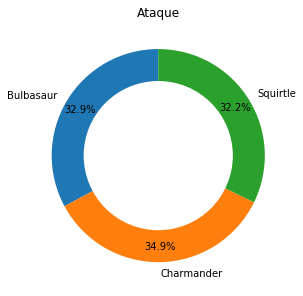

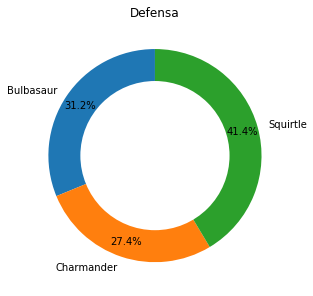

In [27]:
make_pie_plot(top3.Name.values,top3.Attack.values,title = 'Ataque')
make_pie_plot(top3.Name.values,top3.Defense.values,title = 'Defensa')

Para evaluar correctamente que Pokemon elegir basandonos solamente en defensa y ataque creamos la variable **Calidad**:

\begin{equation*}
Calidad = Defensa + Ataque
\end{equation*}

In [20]:
top3['Calidad'] = top3['Defense']+top3['Attack']

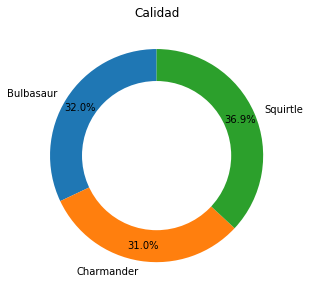

In [21]:
make_pie_plot(top3.Name.values,top3.Calidad.values,title = 'Calidad')

Hemos definido el indicador 'Calidad'. El pokemon con mejor calidad es Squirtle

In [29]:
top3.sort_values('Calidad',ascending=False)

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Stage,Legendary,Calidad
6,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,113
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,98
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,95


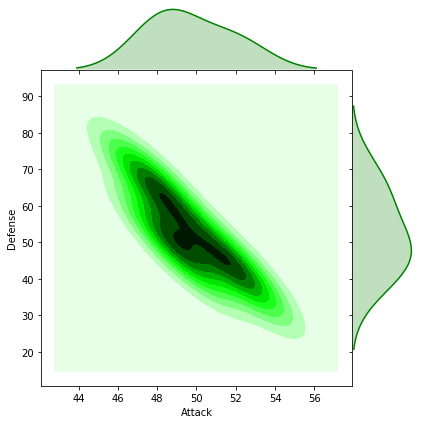

In [25]:
sns.jointplot(x=top3.Attack,y=top3.Defense,kind="kde", space=0, color="g")

# No tengo muy claro lo que has hecho aqui

In [ ]:
grouped4 = df[df['Type 1'].isin(['Water', 'Fire', 'Grass'])]
grouped4 = grouped4.groupby('Type 1').agg({'Attack':'mean', 'Defense':'mean'}).round(2).reset_index()
grouped4

In [ ]:
g = sns.jointplot("Attack", "Defense", 
                  data=grouped4, 
                  kind="scatter", 
                  space=0, color="g", height=10)

### Exercici 2

La ciudad de Barcelona está realizando un estudio para ampliar las áreas verdes de la ciudad. Es por ello que el ayuntamiento de Barcelona requiere de nuestro servicio para construir un mapa **interactivo** que muestre los puntos donde hay árboles y palmeras en la ciudad.

Nos piden crear un mapa utilizando la librería _geoplotlib_ que nos debe permitir ver la localización de cada árbol/palmera. <span style="font-family: Courier New; background-color: #ffcc5c; color: #000000; padding: 3px; ">EG</span>

Nota 1: Puede obtener los datos del arbolado de zona de la ciudad de Barcelona en el portal [Open Data BCN](https://opendata-ajuntament.barcelona.cat/data/es/dataset) y [cargar los datos](https://github.com/andrea-cuttone/geoplotlib/wiki/user-Guide#loading-data) a partir de un diccionario o un dataframe. Sino también puede cargar el conjunto de datos `arbrat_zona.csv` **(que os proporcionamos junto con el enunciado de la PEC)**.

Nota 2: Es importante que los tipos diferentes de zonas (arbol o palmera) tengan distinto color en el mapa.

**(2.5 puntos)**

In [ ]:
data = pd.read_csv(path + 'arbrat_zona.csv', encoding = 'utf-8')
data = data.rename(columns={'LATITUD_WGS84':'lat', 'LONGITUD_WGS84':'lon' })
data = data.drop(columns=['X_ETRS89', 'Y_ETRS89'])

In [ ]:
data1 = data[data['TIPUS_ELEMENT'] == 'PALMERA ZONA']
data1.head(2)

In [ ]:
data2 = data[data['TIPUS_ELEMENT'] == 'ARBRE ZONA']
data2.head(2)

In [ ]:
import geoplotlib

data1 = geoplotlib.utils.DataAccessObject.from_dataframe(data)
data2 = geoplotlib.utils.DataAccessObject.from_dataframe(data2)

# Mostramos los puntos del fichero directamente sobre un mapa en color azul.
geoplotlib.dot(data1, color='g', point_size=2.75)
geoplotlib.dot(data2, color='b', point_size=2.75)

# Mostramos el mapa dentro del notebook.
geoplotlib.inline()

### Ejercicio 3

Teniendo en cuenta los datos obtenidos en el ejercicio anterior, el ayuntamiento de Barcelona también nos pide llevar a cabo un análisis descriptivo de los árboles. <span style="font-family: Courier New; background-color: #82b74b; color: #000000; padding: 3px; ">NM</span> 

1. ¿Cuántos árboles y cuántas palmeras han plantado cada año? **Ver resultados separados para cada grupo (árbol y palmera).**

2. Adicionalmente, se nos pide generar una gráfica que muestre la **distribución** de los meses en los que se han plantado árboles y palmeras en los últimos 3 años (de 2017 2019).

Nota 1: La columna con la información de la fecha de plantación tiene missing. Por lo tanto, se deben seleccionar sólo aquellas filas con este dato.

Nota 2: Para obtener la información del mes y año a partir de la fecha, puede utilizar la función _DatetimeIndex_ de la librería pandas.

Nota 3: La visualización de los datos debería ser atractiva y clara a fin de que los responsables del ayuntamiento puedan sacar conclusiones de ellas.


**(2.5 puntos)**

In [ ]:
#cargamos el dataset nuevamente
df = pd.read_csv(path + 'arbrat_zona.csv', encoding = 'utf-8')

In [ ]:
#aplicamos las funciones para explorar nuestro dataset

In [ ]:
def cleanUp_columns(data):
    '''
    This function map column names with values in lowercase and low_uderscore instead of spaces if apply.
        >>> Parameter 1: [DataFrame] Pandas DataFrame.
        ------------------------------------------------
        <<< Return: None
    '''
    data.rename(columns= {column: column.lower().replace(' ', '_') for column in data.columns.tolist()},
                inplace = True)

In [ ]:
cleanUp_columns(df)
df.columns

In [ ]:
#chequeamos valores nulos en nuestro dataset

def nullvaluesf_count(data):
    '''
    This function displays the features that contains null values as well as the correspondig count:
        >>> Parameter 1: [DataFrame] Pandas DataFrame.
        ------------------------------------------------
        <<< Return: Features with null values and count.
    '''
    print('Features with null values:')
    null_values = {}
    for i in data.columns[data.isnull().any()]:
        null_values[i] = data.shape[0] - data.loc[:, i].count()
        
    return null_values

In [ ]:
nullvaluesf_count(df)

In [ ]:
#Como explica el enunciado "La columna con la información de la fecha de plantación tiene missing" 
#Filtraremos nuestro df con sólo aquellas filas que contengan este dato.
df = df[df['data_plantacio'].isna() == False].reset_index()

In [ ]:
#comprobamos que no haya valores nulos
df['data_plantacio'].isna().any()

In [ ]:
#convertimos a DateTime la columna 'data_plantacio'
df['data_plantacio'] = pd.to_datetime(df['data_plantacio'])

In [ ]:
#comprobamos los "dtypes" de nuestro dataset
df['data_plantacio'].dtypes

In [ ]:
#creamos la columna 'año_plantacio' y 'mes_plantacio' para las graficas necesarias
df['año_plantacio'] = df['data_plantacio'].dt.strftime('%Y')
df['mes_plantacio'] = df['data_plantacio'].dt.strftime('%Y-%m')
df = df.drop(columns='index')
df.head()

In [ ]:
#creamos una función para graficar la respuesta 1

def answer1(df): 
    #filtramos los datos solicitados en el enunciado
    table1 = df[df['tipus_element'] ==
                'ARBRE ZONA'].groupby('año_plantacio').agg({'tipus_element':'count'}).reset_index()
    table2 = df[df['tipus_element'] == 
                'PALMERA ZONA'].groupby('año_plantacio').agg({'tipus_element':'count'}).reset_index()
    table1 = table1.rename(columns = {'tipus_element': 'arbre'})
    table2 = table2.rename(columns = {'tipus_element': 'palmera'})

    #unimos las agrupaciones
    filtered = pd.merge(table1,
                     table2,
                     on='año_plantacio', 
                     how='outer')

    filtered.fillna(0, inplace = True)

    filtered['palmera'] = filtered['palmera'].astype(int)

    #finalmente obtenemos el dataframe necesario para realizar el ejercicio y graficamos
    display(filtered)
    sns.set()
    f, ax = plt.subplots(2, 1, figsize=(15, 7), sharex=False)
    g1 = sns.catplot(x='año_plantacio', y='arbre', data=filtered, kind='bar', ax=ax[0])
    g2 = sns.catplot(x='año_plantacio', y='palmera', data=filtered, kind='bar', ax=ax[1])
    
    return plt.show()

In [ ]:
answer1(df)

In [ ]:
#creamos una función para graficar la respuesta 1

def answer2(df): 
    
    df = df[df['año_plantacio'].isin(['2017', '2018', '2019'])]
    
    #filtramos los datos solicitados en el enunciado
    table1 = df[df['tipus_element'] ==
                'ARBRE ZONA'].groupby('mes_plantacio').agg({'tipus_element':'count'}).reset_index()
    table2 = df[df['tipus_element'] == 
                'PALMERA ZONA'].groupby('mes_plantacio').agg({'tipus_element':'count'}).reset_index()
    table1 = table1.rename(columns = {'tipus_element': 'arbre'})
    table2 = table2.rename(columns = {'tipus_element': 'palmera'})

    #unimos las agrupaciones
    filtered = pd.merge(table1,
                     table2,
                     on= 'mes_plantacio',
                     how='outer')

    filtered.fillna(0, inplace = True)

    filtered['palmera'] = filtered['palmera'].astype(int)
    filtered['arbre'] = filtered['arbre'].astype(int)
    filtered = filtered.sort_values('mes_plantacio')

    #finalmente obtenemos el dataframe necesario para realizar el ejercicio y graficamos
    display(filtered)
    sns.set()
    f, ax = plt.subplots(2, 1, figsize=(15, 7), sharex=False)
    g1 = sns.lineplot(x="mes_plantacio", y="arbre", data=filtered, ax=ax[0])
    g1.set_xticklabels(g1.get_xticklabels(), rotation=45)
    g2 = sns.lineplot(x="mes_plantacio", y="palmera", data=filtered, color= 'g', ax=ax[1])
    g2.set_xticklabels(g2.get_xticklabels(), rotation=45)
    
    return plt.show()

In [ ]:
answer2(df)

### Ejercicio 4

Juego de Tronos es conocida por las complicadas interacciones entre sus personajes. En este ejercicio trabajaremos con el conjunto de datos `book1.csv` que constituye una red de las relaciones entre los personajes del primer libro de _Juego de Tronos_. <span style="font-family: Courier New; background-color: #ffcc5c; color: #000000; padding: 3px; ">EG</span>

Cada fila representa un link entre 2 personajes (Source y Target) y el valor (Weight) indica el número de veces que han interaccionado.

1. Representad gráficamente el grafo y pintad de diferente color cada comunidad detectada.

2. Cuál es el personaje más importante del primer libro de Juego de Tronos?

Nota: La importancia de un nodo dentro de una red se mide con el número de nodos a los que está conectado. Esta característica se conoce con el nombre de **degree_centrality**. Podéis ver este [link](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html#networkx.algorithms.centrality.degree_centrality) para más información:

**(2.5 puntos)**

In [ ]:
# Datos disponibles para el ejercicio

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx 

# Cargamos los datos del fichero book1.csv en un dataframe
book1 = pd.read_csv('data/book1.csv')

# Creamos un objeto grafo vacío
G_book1 = nx.Graph()

# Iteramos para todas las filas del dataset
for _, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

In [ ]:
book1.head()

# Importamos la librería de detección de comunidades.
import community
from community import best_partitio
# Generamos una nueva figura.
plt.figure(1, figsize=(12, 10))
# Calculamos las posiciones de los nodos del grafo en el plano con el algoritmo # spring.
graph_pos = nx.spring_layout(G)
# Detectamos las comunidades existentes en el grafo.
partition = community.best_partition(G)
# Definimos los colores que utilizaremos para los nodos.
colors = ['green', 'blue', 'red', 'orange', 'yellow', 'magenta', 'white'] # Para cada comunidad detectada, mostramos los nodos:
for count, com in enumerate(set(partition.values())):
# Seleccionamos los nodos de la comunidad que estamos procesando.
list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
# Mostramos los nodos, coloreados según la comunidad a la que pertenecen.
nx.draw_networkx_nodes(G, graph_pos, list_nodes, node_size = 800,
node_color = colors[count], alpha = 0.5)
# Mostramos las aristas del grafo, especificando la posición,
# el color y la transparencia.
nx.draw_networkx_edges(G, graph_pos, edge_color='k', alpha=0.3)
# Mostramos las etiquetas, indicando la fuente y el tamaño.
a = nx.draw_networkx_labels(G, graph_pos, font_size=12,␣ 􏰀→font_family='sans-serif')

In [ ]:
import community

### Ejercicio Opcional

Mediante la _degree centrality_ hemos podido descubrir cuál es el personaje más importante del primer libro de _Juego de Tronos_. Sin embargo, esta saga consta de cinco volúmenes, por lo tanto, tiene sentido que la importancia de los personajes cambie a lo largo de los cinco libros.

En este ejercicio estudiaremos la evolución de los personajes mediante la red de relaciones de los cinco libros. Trabajaremos con los conjuntos de datos `book1.csv`,` book2.csv`, `book3.csv`,` book4.csv` y `book5.csv` **(que os proporcionamos junto con el enunciado de la PEC)**. <span style="font-family: Courier New; background-color: #f2ae72; color: #000000; padding: 3px; ">EI</span>

- ¿Cuál es el personaje más importante de cada libro?
- Muestra gráficamente cómo varía la importancia de Eddard Stark, Arya Stark, Tyrion Lannister, Jon Snow y Cersei Lannister en cada libro.

In [ ]:
# Respuesta

---

## Soluciones a los ejercicios para practicar

### Ejercicio 1

Cargad el conjunto de datos `pulitzer-circulation-data.csv` en un dataframe de Pandas. La fuente original de este conjunto de datos es el repositorio de datos de [FiveThirtyEight] (https://github.com/fivethirtyeight/data).

Cread un diagrama de dispersión que permita visualizar las muestras del conjunto de datos de pulitzer según las variables `Daily Circulation 2004` y `Daily Circulation 2013`. Incluid una recta con el ajuste lineal entre las dos variables. En cuanto a los detalles de visualización, limitad la visualización de ambos ejes en el intervalo (0, 1000000), utilice el estilo `whitegrid` de Seaborn, y dibuja los puntos y la línea en color verde.

Pista: podéis utilizar la función `jointplot` que hemos visto en el Notebook de explicación. Considerad qué tipo de gráfica, [de entre las que ofrece jointplot] (http://seaborn.pydata.org/generated/seaborn.jointplot.html), se ajusta a los requerimientos del enunciado.

In [ ]:
# Importamos las librerías
import pandas as pd
import seaborn as sns

# Mostramos las gráficas en el notebook
%matplotlib inline

# Indicamos que queremos utilizar el estilo "whitegrid" de Seaborn
sns.set_style("whitegrid")

# Cargamos los datos del fichero pulitzer-circulation-data.csv en un dataframe
data = pd.read_csv('data/pulitzer-circulation-data.csv')

# Generamos la gráfica de tipo "reg"
g = sns.jointplot("Daily Circulation 2004", "Daily Circulation 2013", data=data, 
                  xlim=[0, 1000000], ylim=[0, 1000000],
                  kind="reg", 
                  color="g", height=8)

### Ejercicio 2

_Juego de Tronos_ es una serie de televisión basada en la famosa saga _Una Canción de Fuego y Hielo_ de George RR Martin. Esta serie es conocida por sus complejos escenarios políticos y bélicos, así como las numerosas muertes de personajes.

En este ejercicio trabajamos con el dataset `battles.csv` que nos da información sobre las batallas que han tenido lugar a lo largo de _Juego de Tronos_.

Cread un diagrama de puntos (_scatter_) que permita comparar el tamaño ( `attacker_size` vs` defender_size`) de los dos principales ejércitos involucrados en cada batalla. Utilizad la columna `attacker_outcome` para mostrar con diferentes colores el resultado de la batalla por el atacante.

Podéis utilizar la función [ `lmplot`] (https://seaborn.pydata.org/generated/seaborn.lmplot.html) de Seaborn para generar la gráfica. Considerad qué atributos nos permiten crear este tipo de visualización.

Viendo la gráfica, podemos afirmar que el tamaño del ejército es determinante en el _outcome_ de la batalla?

Nota: utilizad el estilo `whitegrid` de Seaborn.


In [ ]:
# Importamos las librerías
import pandas as pd
import seaborn as sns

# Mostramos las gráficas en el notebook
%matplotlib inline

# Indicamos que queremos utilizar el estilo "whitegrid" de Seaborn
sns.set(style="whitegrid")

# Cargamos los datos del fichero got.csv en un dataframe
got_data = pd.read_csv('data/battles.csv')

# Eliminamos las muestras con valores NaN en las columnas attacker_size o defender_size
got_data = got_data.dropna(subset=["attacker_size", "defender_size"])

# Mostramos la gráfica
sns.lmplot(x="attacker_size", y="defender_size", hue="attacker_outcome", scatter=True, fit_reg=False, data=got_data)

**Respuesta** 

Veient la gràfica anterior, no podem afirmar que la mida de l'exèrcit és determinant en l'outcome de la batalla. Com podem observar, hi ha casos on l'atacant perd la batalla tot i la superioritat numèrica de les tropes i a l'inrevés, l'atacant guanya la batalla tot i la superioritat numèrica del bàndol contrari.

### Ejercicio 3

En los reinos de Poniente, los Grandes Maestros consideran que todo el mundo debería tener acceso a una biblioteca. Desgraciadamente, después de una gran guerra la red de carreteras que comunican estos reinos ha quedado gravemente afectada. Los Grandes Maestros nos han contratado para resolver las siguientes cuestiones:

1. ¿Qué reinos han quedado sin poder acceder a una biblioteca?
2. ¿Cuál es el número mínimo de bibliotecas que se deberían construir para que todo el mundo vuelva a tener acceso a una biblioteca? (Si no podemos re-construir ninguna carretera)
3. ¿Cuál es el coste mínimo de re-construcción de carreteras a fin de que todo el mundo vuelva a tener acceso a una biblioteca? (Si no podemos construir ninguna biblioteca)
4. Viendo la respuesta de la pregunta 2 y 3, que sería lo más óptimo teniendo en cuenta que queremos minimizar los costes?

Para poder responder a estas preguntas, los Grandes Maestros nos facilitan la siguiente información:

- Disponemos de un grafo con el estado de la red de carreteras entre los reinos.
- Disponemos de un listado con las ciudades que disponen de una biblioteca.
- Una ciudad se considera que tiene acceso a una biblioteca si existe una biblioteca en la misma ciudad o si los habitantes pueden viajar por carretera hasta otra ciudad con biblioteca.
- El coste de construir una biblioteca es de 150.000 €.
- El coste de re-construir una carretera es de 80.000 €.

Nota: para resolver el ejercicio, **tenéis que generar una visualización del grafo que os permita responder a las cuatro preguntas planteadas**. Después, **recuerda responder a las cuatro preguntas!**


In [ ]:
# Datos disponibles para el ejercicio

import networkx as nx

# Lista de carreteras transitables
carreteras_ok = [(1,3), (3,4), (2, 7), (2, 8), (5, 6), (9, 10)]

# Lista de carreteras cortadas
carreteras_ko = [(1, 2), (2, 4), (2, 5), (8, 9)]

# Graf G, que representa la red de carreteras entre las ciudades
G = nx.Graph()

G.add_edges_from(carreteras_ok)
G.add_edges_from(carreteras_ko) 

# Lista de ciudades con biblioteca
ciudades_con_biblioteca = [3, 6, 9]

In [ ]:
%matplotlib inline

# Calculamos la posición de los nodos usando el algoritmo spring
graph_pos = nx.spring_layout(G)

# Mostramos los nodos del grafo. Mostramos con un tamaño más grande y en azul las ciudades que tienen biblioteca
nx.draw_networkx_nodes(G, graph_pos, ciudades_con_biblioteca, node_size=700, node_color='blue', alpha = 0.6)

# Mostramos con un tamaño más pequeño y en naranja los otros nodos del grafo
ciudades_sin_biblioteca = list(set(G.nodes()) - set(ciudades_con_biblioteca))
nx.draw_networkx_nodes(G, graph_pos, ciudades_sin_biblioteca, node_size=300, node_color='orange', alpha = 0.6)
 
# Mostramos las etiquetas del nodos, especificando el tamaño y la fuente
nx.draw_networkx_labels(G, graph_pos, font_size=12, font_family='sans-serif')
    
# Mostramos las aristas del grafo
# Primero, mostramos con color verde las aristas que corresponden a las carreteras que aún son transitables
nx.draw_networkx_edges(G, graph_pos, edgelist=carreteras_ok, edge_color='green', alpha=0.5)

# Mostramos con color rojo las aristas que corresponden a las carreteras cortadas
nx.draw_networkx_edges(G, graph_pos, edgelist=carreteras_ko, edge_color='red', alpha=0.5)

**Respuesta**

Una vez construido el grafo, podemos contestar las preguntas que nos han hecho los Grandes Maestros.

- Qué reinos han quedado sin poder acceder a una biblioteca?

Los reinos que han quedado sin acceso a una biblioteca son: `[2, 7, 8]`.

- Cuál es el número mínimo de bibliotecas que se deberían construir para que todo el mundo vuelva a tener acceso a una biblioteca? (Si no podemos re-construir ninguna carretera)

Dado que los tres reinos que han quedado sin acceso a una biblioteca están conectados entre sí (aunque quedan carreteras que los unen), podemos construir una biblioteca en cualquiera de los tres para que los ciudadanos de estos reinos puedan volver a disfrutar de una biblioteca. Por tanto, el número mínimo de bibliotecas sería **1**.

- Cuál es el coste mínimo de re-construcción de carreteras a fin de que todo el mundo vuelva a tener acceso a una biblioteca? (Si no podemos construir ninguna biblioteca)

Siguiendo el mismo razonamiento anterior, si re-construimos la carretera que conectaba el reino 8 con el reino 9 (que tiene biblioteca), también estaremos habilitando el acceso a los reinos 2 y 7. Por tanto, el coste mínimo para re-construir carreteras sería **150.000 €**.

- Viendo la respuesta de la pregunta 2 y 3, que sería lo más óptimo teniendo en cuenta que queremos minimizar los costes?

En este caso, lo más óptimo sería re-construir una carretera (por ejemplo la que une los reinos 8 y 9). Esto costaría `80.000 €`, mientras que construir una biblioteca nos implica un coste de `150.000 €`.